Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import libpysal as ps 
from libpysal.weights import Queen
from esda.moran import Moran

#MGWR functions
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW

# Importing Non-motorized Crashes Data

In [2]:
Crashes = gpd.read_file("C:/Users/jacob/OneDrive - Florida State University/SPRING 24/Applied Spatial Statistics/final project/Data/Merge2010_2019.shp")

In [3]:
Crashes

,RdwyID,MilePost,RdSys,SSO_Lat,SSO_Long,P_TypeCD,P_Type,P_GenCD,P_Gender,P_Age,...,PreActCD,PrAction,ActCirCD,P_ActCir,SpctAlCD,SpctAlc,SpctRxCD,SpctDrug,FID_1,geometry
0,0,0.000,None,0.000000,0.000000,0,None,0,None,0,...,0,None,0,None,0,None,0,None,0,POINT (-80.11647 26.61857)
1,0,0.000,None,0.000000,0.000000,0,None,0,None,0,...,0,None,0,None,0,None,0,None,0,POINT (-80.13831 26.61906)
2,0,0.000,None,0.000000,0.000000,0,None,0,None,0,...,0,None,0,None,0,None,0,None,0,POINT (-80.19353 25.86619)
3,0,0.000,None,0.000000,0.000000,0,None,0,None,0,...,0,None,0,None,0,None,0,None,0,POINT (-80.18684 26.12129)
4,0,0.000,None,0.000000,0.000000,0,None,0,None,0,...,0,None,0,None,0,None,0,None,0,POINT (-80.18503 26.06233)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81213,14000000,0.000,Off-system,28.382367,-82.660894,1,Pedestrian,1,Male,24,...,5,Walking/cycling on sidewalk,1,No improper action,88,Unknown,88,Unknown,0,POINT (-82.66090 28.38237)
81214,14030000,0.259,On-system,28.177011,-82.740390,1,Pedestrian,1,Male,54,...,5,Walking/cycling on sidewalk,1,No improper action,1,No,1,No,0,POINT (-82.74039 28.17702)
81215,17008000,2.631,On-system,27.298751,-82.487563,1,Pedestrian,1,Male,58,...,77,Other,1,No improper action,1,No,1,No,0,POINT (-82.48757 27.29876)
81216,58030000,9.561,On-system,30.393989,-87.038253,3,Bicyclist,1,Male,38,...,4,Walking/cycling along roadway against traffic ...,1,No improper action,1,No,1,No,0,POINT (-87.03826 30.39399)


<Axes: >

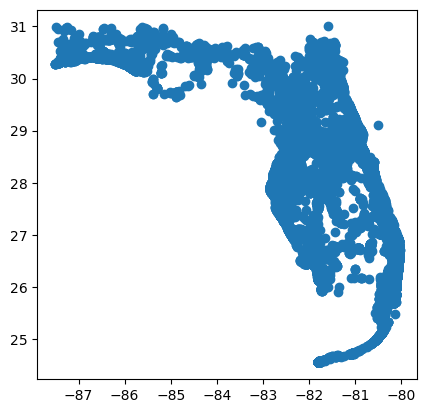

In [4]:
Crashes.plot()

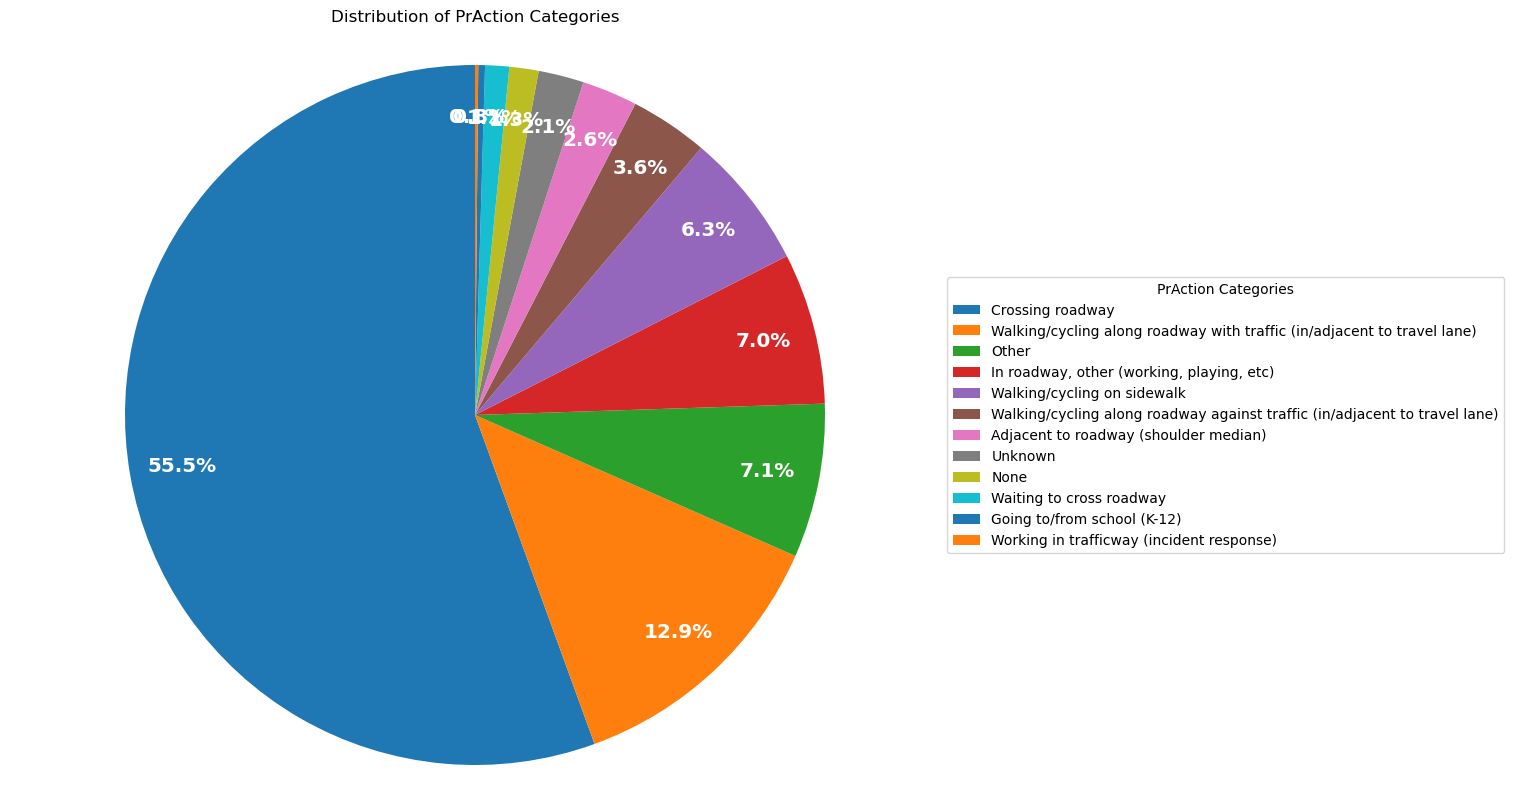

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'Crashes'
# Count the occurrences of each category in the PrAction column
action_counts = Crashes['PrAction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 10))  # Sets the figure size
pie_wedges, texts, autotexts = plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', pctdistance=0.85, startangle=90)

# Increase the size and style of percentage texts
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('x-large')
    autotext.set_weight('bold')

plt.title('Distribution of PrAction Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjusting the position of the labels (callout labels)
for text, wedge in zip(texts, pie_wedges):
    text.set_text('')  # Clear the default labels
    x, y = wedge.center
    plt.text(x, y, text.get_text(), horizontalalignment='center', verticalalignment='center', fontsize=9, color='black', weight='bold')

# Adding a legend outside the pie chart
plt.legend(pie_wedges, action_counts.index, title="PrAction Categories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


# Importing Census Tract which Contain the Socio-demographic Information

In [6]:
Tract = gpd.read_file("C:/Users/jacob/OneDrive - Florida State University/SPRING 24/Applied Spatial Statistics/final project/tract.shp")

In [7]:
Tract

,GEOID20,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,ACRES,LOGRECNO,FILEID,STUSAB,...,PCT_HISP,PCT_DIS20,DESCRIPT,FGDLAQDATE,TIGERYEAR,DATAYEAR,AUTOID,SHAPE_Leng,SHAPE_Area,geometry
0,12001000500,Census Tract 5,3917560.0,1068.0,+29.6568455,-82.3169268,968.314115,1933.0,ACSSF,FL,...,7.69,16.77,12001000500,2022-04-14,2020 Tiger,ACS 2016-2020,6,9407.714355,3.918628e+06,"POLYGON ((561346.641 628241.313, 561345.933 62..."
1,12001000600,Census Tract 6,7590802.0,103244.0,+29.6557620,-82.2886904,1901.239604,1934.0,ACSSF,FL,...,1.42,16.22,12001000600,2022-04-14,2020 Tiger,ACS 2016-2020,7,12439.392991,7.694044e+06,"POLYGON ((563222.421 628375.773, 563268.218 62..."
2,12001000700,Census Tract 7,22450709.0,456638.0,+29.6280432,-82.2957817,5660.524637,1935.0,ACSSF,FL,...,6.84,19.62,12001000700,2022-04-14,2020 Tiger,ACS 2016-2020,8,21286.515608,2.290733e+07,"POLYGON ((561687.461 626534.976, 561711.676 62..."
3,12001000806,Census Tract 8.06,949560.0,1453.0,+29.6391178,-82.3322072,235.000126,1936.0,ACSSF,FL,...,9.70,9.10,12001000806,2022-04-14,2020 Tiger,ACS 2016-2020,9,4122.414377,9.510118e+05,"POLYGON ((560543.038 626758.795, 560542.368 62..."
4,12001000808,Census Tract 8.08,2637624.0,188599.0,+29.6274199,-82.3335258,698.375228,1937.0,ACSSF,FL,...,18.92,12.26,12001000808,2022-04-14,2020 Tiger,ACS 2016-2020,10,7036.253969,2.826224e+06,"POLYGON ((560432.420 624201.686, 560454.646 62..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,12115001509,Census Tract 15.09,4283474.0,219998.0,+27.2800222,-82.4766346,1112.825148,6697.0,ACSSF,FL,...,16.47,12.23,12115001509,2022-04-14,2020 Tiger,ACS 2016-2020,4770,8657.755488,4.503444e+06,"POLYGON ((549609.380 366034.300, 549663.417 36..."
5156,12115001510,Census Tract 15.10,3171774.0,108964.0,+27.2868304,-82.4570152,810.682775,6698.0,ACSSF,FL,...,4.71,5.81,12115001510,2022-04-14,2020 Tiger,ACS 2016-2020,4771,8105.990031,3.280717e+06,"POLYGON ((551702.842 364421.346, 551702.602 36..."
5157,12115001511,Census Tract 15.11,1750679.0,99812.0,+27.2728675,-82.4544930,457.263634,6699.0,ACSSF,FL,...,21.02,7.16,12115001511,2022-04-14,2020 Tiger,ACS 2016-2020,4772,6350.327195,1.850480e+06,"POLYGON ((551701.981 364387.355, 551702.448 36..."
5158,12115002203,Census Tract 22.03,5363312.0,1644007.0,+27.1237834,-82.4389998,1731.546756,6726.0,ACSSF,FL,...,7.26,13.73,12115002203,2022-04-14,2020 Tiger,ACS 2016-2020,4799,13793.862334,7.007321e+06,"POLYGON ((551755.026 346951.455, 551807.906 34..."


## Aggregating the count of non-motorized Crashes into the tract they falls within

In [8]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
if Crashes.crs != Tract.crs:
    Crashes = Crashes.to_crs(Tract.crs)

# Perform a spatial join; note the change from 'op' to 'predicate'
joined = gpd.sjoin(Crashes, Tract, how="inner", predicate='within')

# Count the number of crashes in each tract
crash_counts = joined['index_right'].value_counts().rename_axis('index_right').reset_index(name='crash_counts')

# Map 'index_right' to 'GEOID20' based on the index of Tract
crash_counts['GEOID20'] = crash_counts['index_right'].apply(lambda x: Tract.loc[x, 'GEOID20'])

# Merge the crash counts back into the Tract GeoDataFrame
tract_crashes = Tract.merge(crash_counts, on='GEOID20', how='left')

# Replace NaN with 0 for tracts without any crashes
tract_crashes['crash_counts'] = tract_crashes['crash_counts'].fillna(0)

# Print the result
print(tract_crashes.head())


       GEOID20           NAMELSAD       ALAND    AWATER     INTPTLAT  \
0  12001000500     Census Tract 5   3917560.0    1068.0  +29.6568455   
1  12001000600     Census Tract 6   7590802.0  103244.0  +29.6557620   
2  12001000700     Census Tract 7  22450709.0  456638.0  +29.6280432   
3  12001000806  Census Tract 8.06    949560.0    1453.0  +29.6391178   
4  12001000808  Census Tract 8.08   2637624.0  188599.0  +29.6274199   

      INTPTLON        ACRES  LOGRECNO FILEID STUSAB  ...     DESCRIPT  \
0  -82.3169268   968.314115    1933.0  ACSSF     FL  ...  12001000500   
1  -82.2886904  1901.239604    1934.0  ACSSF     FL  ...  12001000600   
2  -82.2957817  5660.524637    1935.0  ACSSF     FL  ...  12001000700   
3  -82.3322072   235.000126    1936.0  ACSSF     FL  ...  12001000806   
4  -82.3335258   698.375228    1937.0  ACSSF     FL  ...  12001000808   

   FGDLAQDATE   TIGERYEAR       DATAYEAR AUTOID    SHAPE_Leng    SHAPE_Area  \
0  2022-04-14  2020 Tiger  ACS 2016-2020      6  

<Axes: >

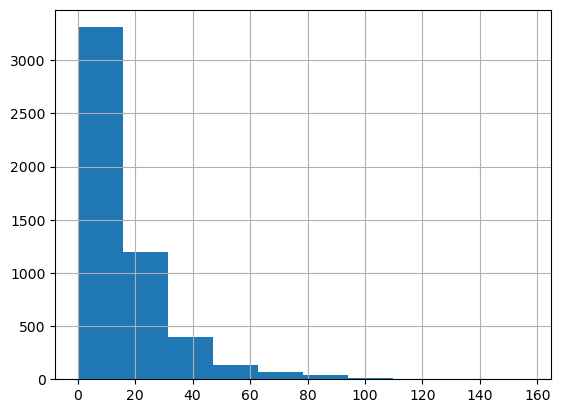

In [9]:
# checking the distribution of the crashes count
tract_crashes.crash_counts.hist()

In [10]:
# Calculate the logarithm of crashes, handling cases where crashes are 0
tract_crashes['logCrashes'] = tract_crashes['crash_counts'].apply(lambda x: np.log(x) if x > 0 else 0)

# Replace -inf values with 0
tract_crashes['logCrashes'].replace(-np.inf, 0, inplace=True)

<Axes: >

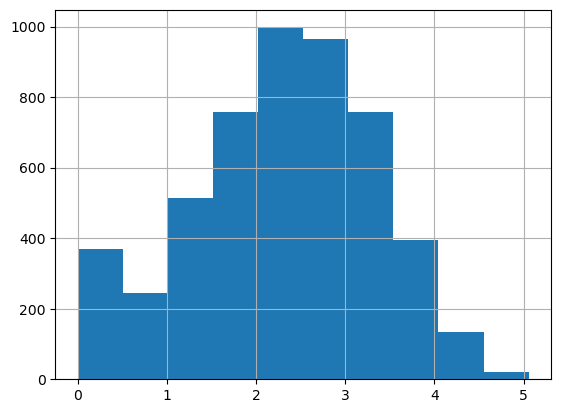

In [11]:
tract_crashes.logCrashes.hist()

## ploting the log of Crashes on the map

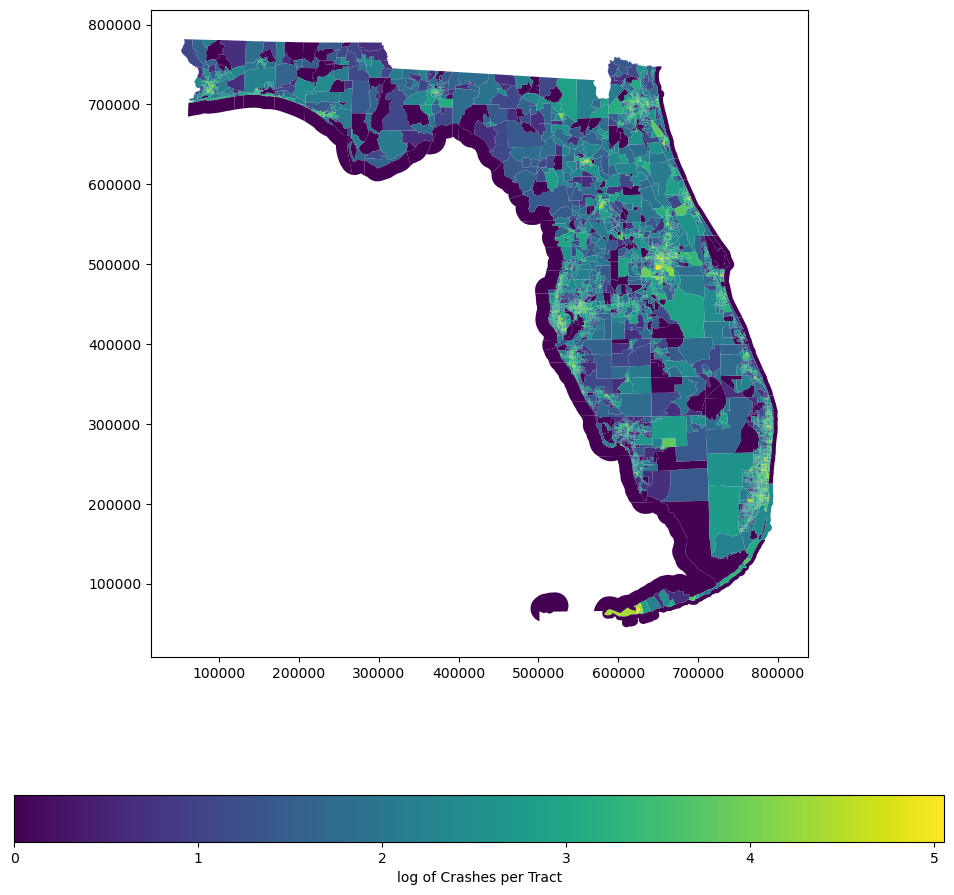

In [12]:
import matplotlib.pyplot as plt

# Plotting the tracts colored by incident counts
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
tract_crashes.plot(column='logCrashes', ax=ax, legend=True,
            legend_kwds={'label': "log of Crashes per Tract",
                         'orientation': "horizontal"})
plt.show()

In [13]:
tract_crashes.columns.tolist()


['GEOID20',
 'NAMELSAD',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'ACRES',
 'LOGRECNO',
 'FILEID',
 'STUSAB',
 'SUMLEVEL',
 'STATE',
 'COUNTY',
 'TRACT',
 'NAME',
 'TOTALPOP',
 'HOUSEHOLDS',
 'MALE',
 'FEMALE',
 'WHITE',
 'BLACK',
 'AMERI_ES',
 'ASIAN',
 'HAWN_PI',
 'OTHER',
 'MULT_RACE',
 'HISPANIC',
 'WHITE_NH',
 'HISPNC_NOT',
 'MINORITY',
 'AVE_HH_SZ',
 'PH_TOTAL',
 'PH_FAM',
 'PH_NONFAM',
 'FAM_HH',
 'AVE_FAM_SZ',
 'AGE_UNDER5',
 'AGE_5_17',
 'AGE_18_21',
 'AGE_22_29',
 'AGE_30_39',
 'AGE_40_49',
 'AGE_50_64',
 'AGE_65_UP',
 'AGE_65_74',
 'AGE_75_84',
 'AGE_85_UP',
 'MED_AGE',
 'HABVBELOW',
 'HBELOW_POV',
 'HABOVE_POV',
 'ABVE_BELW',
 'ABOVE_POV',
 'BELOW_POV',
 'ED_TOTAL',
 'ED_LESS9TH',
 'ED_12NODIP',
 'HSGRAD',
 'ED_SOMECOL',
 'ED_COLLEGE',
 'BACHELORS',
 'HSE_UNITS',
 'HS_PER_AC',
 'VACANT',
 'TRAN_TOTAL',
 'TRAN_CAR',
 'TRAN_MOTO',
 'TRAN_BIKE',
 'TRAN_PUB',
 'TRAN_WALK',
 'TRAN_OTHER',
 'TRAN_HOME',
 'ENROLLED',
 'NOT_ENROLD',
 'LESS_10K',
 'I10K_14K',
 'I15K_19K',
 'I

## Importing road network with Speed limit attribute

In [14]:
Max_speed = gpd.read_file("C:/Users/jacob/OneDrive - Florida State University/SPRING 24/Applied Spatial Statistics/final project/Data/Maximum_Speed_Limit_TDA.shp")

In [15]:
Max_speed

,FID,ROADWAY,ROAD_SIDE,OFFSET_DIR,DISTRICT,COUNTYDOT,COUNTY,MNG_DIST,BEGIN_POST,END_POST,SPEED,Shape_Leng,Shape__Len,geometry
0,1,37010000,C,None,2,37,Suwannee,2,0.079,0.352,45,439.4067,439.406748,"LINESTRING (291061.197 3363217.996, 291093.454..."
1,2,70530000,C,None,5,70,Brevard,5,0.000,0.236,30,379.2237,379.223669,"LINESTRING (524001.125 3138557.000, 524380.344..."
2,3,71580001,C,None,2,71,Clay,2,0.062,0.208,15,234.5262,234.526200,"LINESTRING (416465.146 3326613.940, 416463.432..."
3,4,10600000,C,None,7,10,Hillsborough,7,0.000,2.962,40,4773.1029,4773.102948,"LINESTRING (351942.052 3063454.200, 351945.735..."
4,5,11020000,C,None,5,11,Lake,5,16.124,16.296,35,276.7639,276.763866,"LINESTRING (413686.714 3161279.455, 413623.094..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15419,15420,28030000,C,None,2,28,Bradford,2,0.728,1.016,40,463.9129,463.912860,"LINESTRING (394125.042 3313705.104, 394457.966..."
15420,15421,70060000,C,None,5,70,Brevard,5,9.955,11.500,55,2487.3815,2487.381511,"LINESTRING (547110.030 3096418.868, 546769.125..."
15421,15422,10000300,C,None,7,10,Hillsborough,7,0.000,0.376,30,603.9169,603.916923,"LINESTRING (360081.281 3092365.000, 360085.328..."
15422,15423,75530000,R,None,5,75,Orange,5,7.837,7.846,30,14.5161,14.516108,"LINESTRING (446895.424 3153577.043, 446895.857..."


### Extracting the  median speed limit from the Max_speed into the tract they fall within

In [16]:
import geopandas as gpd

if Max_speed.crs != tract_crashes.crs:
    Max_speed = Max_speed.to_crs(tract_crashes.crs)

# Check if 'index_left' or 'index_right' exists in the columns and rename them
if 'index_left' in tract_crashes.columns:
    tract_crashes = tract_crashes.rename(columns={'index_left': 'index_left_old'})
if 'index_right' in tract_crashes.columns:
    tract_crashes = tract_crashes.rename(columns={'index_right': 'index_right_old'})

if 'index_left' in Max_speed.columns:
    Max_speed = Max_speed.rename(columns={'index_left': 'index_left_old'})
if 'index_right' in Max_speed.columns:
    Max_speed = Max_speed.rename(columns={'index_right': 'index_right_old'})

# Perform a spatial join using the correct 'predicate' parameter
tract_crashes = gpd.sjoin(tract_crashes, Max_speed, how="left", predicate="intersects")

# Group the resulting GeoDataFrame by tract ID and calculate the median speed
median_speed_per_tract = tract_crashes.groupby('GEOID20')['SPEED'].median().reset_index()

# Merge the median speed data back with the original tract_crashes GeoDataFrame
tract_crashes = tract_crashes.merge(median_speed_per_tract, on='GEOID20', how='left', suffixes=('', '_median'))

# Fill NA values in the 'SPEED_median' column
tract_crashes['SPEED_median'].fillna(0, inplace=True)


<Axes: >

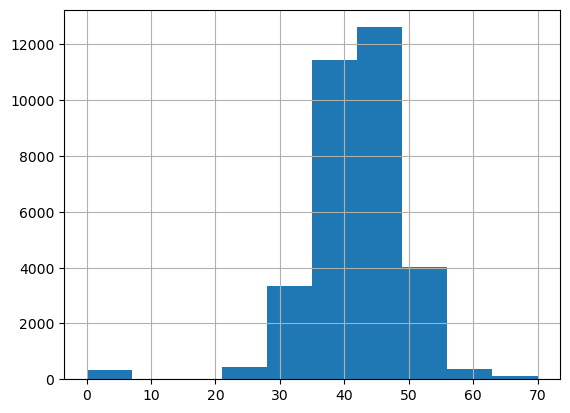

In [17]:
tract_crashes.SPEED_median.hist()

In [18]:
from autoselect import *
y_name = 'logCrashes'
X_names =['PCT_BACHLR', 'PCT_BLACK', 'DEN_POP', 'VEHICLE_0', "MEDHHINC", 'SPEED_median','HBELOW_POV', 'TRAN_WALK','MED_AGE',  'BELOW_POV', 'PCT_POV', 'TRAN_BIKE']

# Backward search Model selection Method
backward_model_selection(y_name, X_names, tract_crashes)


Current model: logCrashes ~ intercept + PCT_BACHLR + PCT_BLACK + DEN_POP + VEHICLE_0 + MEDHHINC + SPEED_median + HBELOW_POV + TRAN_WALK + MED_AGE + BELOW_POV + PCT_POV + TRAN_BIKE
        current    83249.91
-    PCT_BACHLR    84106.44
-     PCT_BLACK    83415.42
-       DEN_POP    83251.35
-     VEHICLE_0    84612.42
-      MEDHHINC    83276.54
-  SPEED_median    83807.73
-    HBELOW_POV    83258.54
-     TRAN_WALK    83584.11
-       MED_AGE    83692.85
-     BELOW_POV    83511.23
-       PCT_POV    83270.45
-     TRAN_BIKE    83535.86

stop

Final model: logCrashes ~ intercept + PCT_BACHLR + PCT_BLACK + DEN_POP + VEHICLE_0 + MEDHHINC + SPEED_median + HBELOW_POV + TRAN_WALK + MED_AGE + BELOW_POV + PCT_POV + TRAN_BIKE


# Employing Tree Ensemble Machine Learning Models

In [19]:
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator,linear_regression, decision_tree_regressor
from hpsklearn import xgboost_regression,random_forest_regressor
from hyperopt import tpe
import shap

In [20]:
# Target
y = tract_crashes['logCrashes']

# Features
X = tract_crashes[['PCT_BLACK', 'VEHICLE_0', 'DEN_POP', 'SPEED_median', 'TRAN_WALK', 'PCT_BACHLR', 'MEDHHINC', 'BELOW_POV', 'TRAN_BIKE']]

In [21]:
# I split the data into training (80%) and testing (20%). The model will be trained based on the training data and the testing data will be used to evaluate the model accuracy on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def train_any_model(X_train, y_train, any_regressor,max_evals=10):
    
    estim = HyperoptEstimator(regressor=any_regressor("myModel"), preprocessing=[],
                              algo=tpe.suggest,max_evals=max_evals,trial_timeout=240,n_jobs=-1)
    
    #5-fold cross validation of your training data
    estim.fit(X_train, y_train, n_folds=5, cv_shuffle=True, random_state=123)
    return estim

In [23]:
%%time
xgb_models = train_any_model(X_train, y_train, xgboost_regression)

best_xgb = xgb_models.best_model()['learner']

# Make predictions on the training set
xgb_train_pred = best_xgb.predict(X_train)

# Make predictions on test set
xgb_pred = best_xgb.predict(X_test)

100%|██████████| 10/10 [00:42<00:00, 42.03s/trial, best loss: 0.07273191561355064]
CPU times: total: 35.1 s
Wall time: 7min 53s


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print("XGB - Train_R2:", r2_score(y_train, xgb_train_pred))
print("XGB - Test_R2:", r2_score(y_test, xgb_pred))


print("XGB - Train_MSE:", mean_squared_error(y_train, xgb_train_pred))
print("XGB - Tes_MSE:", mean_squared_error(y_test, xgb_pred))

XGB - Train_R2: 0.972477156417285
XGB - Test_R2: 0.9350884204395882
XGB - Train_MSE: 0.029243944920102113
XGB - Tes_MSE: 0.07026799113401369


In [25]:
%%time
rf_models = train_any_model(X_train, y_train, random_forest_regressor)

best_rf = rf_models.best_model()['learner']

# Make predictions on the training set
rf_train_pred = best_rf.predict(X_train)

# Make predictions 
rf_pred = best_rf.predict(X_test)

100%|██████████| 1/1 [04:05<00:00, 245.24s/trial, best loss=?]


AllTrialsFailed: 

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print("RF - Train_R2:", r2_score(y_train, rf_train_pred))
print("RF - Test_R2:", r2_score(y_test, rf_pred))


print("RF - Train_MSE:", mean_squared_error(y_train, rf_train_pred))
print("RF - Test_MSE:", mean_squared_error(y_test, rf_pred))

NameError: name 'rf_train_pred' is not defined

In [ ]:
%%time
dt_models = train_any_model(X_train, y_train, decision_tree_regressor)

best_dt = dt_models.best_model()['learner']

# Make predictions on the training set
dt_train_pred = best_dt.predict(X_train)

# Make predictions 
dt_pred = best_dt.predict(X_test)

#### evaluating the performance and accuracy of Descision Tree model(s) on both the training and test 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("DT - Train_R2:", r2_score(y_train, dt_train_pred))
print("DT - Test_R2:", r2_score(y_test, dt_pred))

print("DT - Train_MSE:", mean_squared_error(y_train, dt_train_pred))
print("DT - Test_MSE:", mean_squared_error(y_test, dt_pred))

## Models Comparison

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("XGB - Test_R2:", r2_score(y_test, xgb_pred))

print("RF - Test_R2:", r2_score(y_test, rf_pred))

print("DT - Test_R2:", r2_score(y_test, dt_pred))

In [ ]:
print("XGB - MSE:", mean_squared_error(y_test, xgb_pred))
print("RF - MSE:", mean_squared_error(y_test, rf_pred))
print("DT - MSE:", mean_squared_error(y_test, dt_pred))

##  Random Forest model is chosen to be the best model in predicting non-motorised crashes with the socio-demography variables used because it had the highest R2 and lowest MSE value

## Using shap to explain the prediction

In [ ]:
# Initialize the TreeExplainer with the best trained model
explainer = shap.TreeExplainer(best_rf)

# Compute SHAP values for the entire gdf_income_health dataset.
shap_values = explainer(X)

In [ ]:
total_y_pred = best_rf.predict(X)

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.plots.waterfall(shap_values[3])